In [1]:
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

************************ <class 'pandas.core.frame.DataFrame'>
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and mat

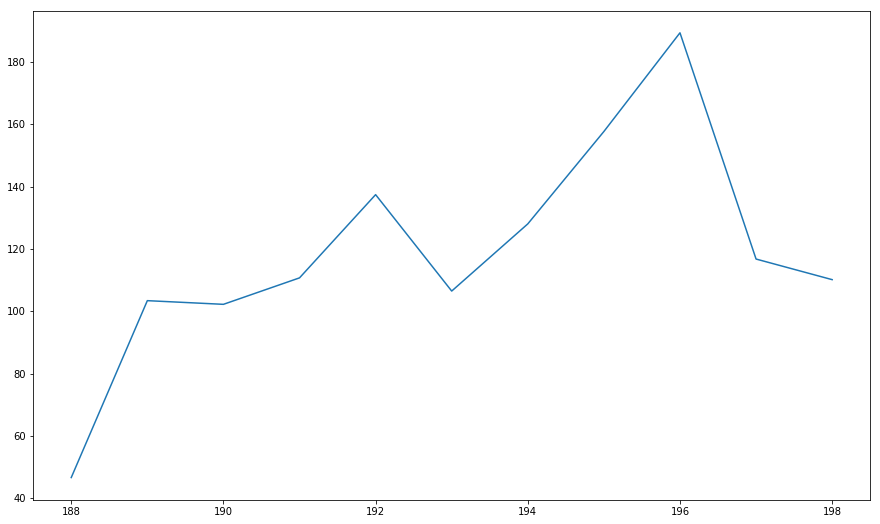

In [16]:
# data = pd.read_csv('demoData.csv')
data = pd.read_csv('demoData.csv', index_col=0)

data.columns = [['open','high','low','close','vol']]

data = data.drop_duplicates(keep=False)

# data.Date = pd.to_datetime(data.Date)

# data = data.set_index(data.Date)

# data = data[['open','high','low','close','vol']]

price = data['vol'].iloc[:200]
print('************************', type(price))
trianglePattern = []

# print(price)
for i in range(100,len(price)):

    max_idx = list(argrelextrema(price.values[:i],np.greater,order=10)[0])
    min_idx = list(argrelextrema(price.values[:i],np.less,order=10)[0])

    idx = max_idx + min_idx + [len(price.values[:i] -1)]
    
    idx.sort()
    
    current_idx = idx[-3:]
    
    start = min(current_idx)
    end = max(current_idx)
    
    current_pat = price.values[current_idx]

    XA = current_pat[1] - current_pat[0]
    AB = current_pat[2] - current_pat[1]
#     BC = current_pat[3] - current_pat[2]
#     AC = current_pat[4] - current_pat[3]
    

    peaks = price.values[idx]
    if XA>0 and AB<0:
        # This line is necessary for the plot to appear in a Jupyter notebook
        %matplotlib inline
        # Control the default size of figures in this Jupyter notebook
        %pylab inline
        pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
        
        plt.plot(np.arange(start,i), price.values[start:i])
        trianglePattern.append(current_pat);
#         plt.plot(current_idx,current_pat,c='r')
#         plt.show()
    
print('pattern:', trianglePattern)